<a href="https://colab.research.google.com/github/com0040/python_MechinLearning_and_DeepLearning_Basic/blob/main/19_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_(RNN%2C_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# imdb 영화 리뷰 데이터(긍정, 부정) // 많이 사용된 순으로 1위-500위까지 단어만 가져온다다
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words =500)

In [14]:
# 2 : 500위 안에 못든 단어
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [15]:
# 1 이면 긍정 0 이면 부정
train_target[0] 

1

In [16]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [17]:
# 리뷰의 길이가 다른데 어떻게 맞출것인가?
import numpy as np

box = []

for i in train_input:
    box.append(len(i))

np.mean(box) # 리뷰에 쓰인 단어 갯수수 평균

238.7486

In [23]:
from  keras.utils import pad_sequences

# 단어가 적든 많든 무조건 리뷰 안에 있는 단어를 100개로 맞춘다.
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [24]:
# 단어가 많으면 앞에서부터 자릅니다.
# 단어가 적으면 0으로 채워서라도 100개를 맞춥니다다
train_seq.shape

(20000, 100)

In [71]:
train_seq[1]

array([ 45,   6,   2,  56, 200,   2,   2,   5,   2,   2, 261,  36,  71,
       199,   6, 227,  99, 154,  18,   4, 217,  13,   2, 219,   6,   2,
       248, 310,   7,   2,  19,   2,   2,   5,   2,   2,  13,  62, 119,
         8,  67, 148, 107,  81,   2,   2,  34,   4,  58,  13, 188,   8,
       149,   4,   2,   2, 310,  13, 104,  13,  16,   2,   2,  46,  21,
        13,  80, 115,   2,   7, 148,  86, 171, 234,   7,   2,   2,   2,
         2,   2,   4,   2,   7,   4,  86, 310,  13, 126, 219,  13, 210,
       181,   8, 140, 145,   5, 332,   4, 274, 174], dtype=int32)

In [66]:
# 원핫인코딩 : 해당 숫자만 1이고 나머지가 다 0인

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [67]:
train_oh.shape

(20000, 100, 500)

In [70]:
train_oh[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

hist = model.fit(train_oh, train_target, epochs = 10000, validation_data = (val_oh, val_target),
                 callbacks =[es])

Epoch 1/10000
625/625 [==============================] - 21s 31ms/step - loss: 0.6846 - accuracy: 0.5513 - val_loss: 0.6626 - val_accuracy: 0.6248
Epoch 2/10000
625/625 [==============================] - 16s 25ms/step - loss: 0.5338 - accuracy: 0.7372 - val_loss: 0.4783 - val_accuracy: 0.7782
Epoch 3/10000
625/625 [==============================] - 16s 25ms/step - loss: 0.4672 - accuracy: 0.7842 - val_loss: 0.4749 - val_accuracy: 0.7880
Epoch 4/10000
625/625 [==============================] - 16s 25ms/step - loss: 0.4444 - accuracy: 0.7965 - val_loss: 0.4491 - val_accuracy: 0.7926
Epoch 5/10000
625/625 [==============================] - 16s 26ms/step - loss: 0.4288 - accuracy: 0.8051 - val_loss: 0.4518 - val_accuracy: 0.7922
Epoch 6/10000
625/625 [==============================] - 18s 29ms/step - loss: 0.4193 - accuracy: 0.8111 - val_loss: 0.4529 - val_accuracy: 0.7858
Epoch 7/10000
625/625 [==============================] - 25s 41ms/step - loss: 0.4086 - accuracy: 0.8187 - val_loss: 0

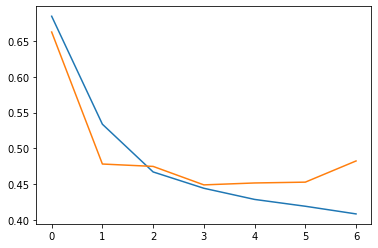

In [75]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

hist = model.fit(train_oh, train_target, epochs = 10000, validation_data = (val_oh, val_target),
                 callbacks =[es])